In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
torch.set_default_device('cpu')

import numpy as np

from transformers_simple.transformer import GPT
from transformers_simple.train import Trainer
from transformers_simple.dataset import CharDataset

In [2]:
N = 4
block_size  = 2
embed_size  = 6
hidden_size = 60
attn_hidden_size = 60
output_size = 3
num_heads   = 3
vocab_size  = 3
num_transformer_blocks = 3

log_interval = 10
epochs = 5
learning_rate = 5e-4
device = torch.device('cpu')

In [3]:
# #block size 1
# data = "".join(["abca"]*1000)

In [4]:
# block size 2
data = "".join(["aabcacb"]*1000)

In [5]:
dataset = CharDataset(data=data, block_size=block_size)
dataset[0]

(tensor([0, 0]), tensor([0, 1]))

In [6]:
net = GPT(vocab_size=vocab_size, 
          block_size=block_size,
          embed_size=embed_size,
          hidden_size=hidden_size,
          attn_hidden_size=attn_hidden_size,
          output_size=output_size,
          num_transformer_blocks=num_transformer_blocks,
          num_heads=num_heads,
         attn_dropout=0.0,
          attn_block_dropout=0.0,
         residual_dropout=0.0,
         embed_dropout=0.0)

In [7]:
x = dataset[0][0].view(1,-1)

In [8]:
x

tensor([[0, 0]])

In [9]:
loss = torch.nn.CrossEntropyLoss()

def loss_fn(o,y):
    #return loss(o.view(-1,vocab_size),y.view(-1))

    return loss(o[:,-1],y[:,-1])

In [10]:
trainer = Trainer(model=net, 
                  dataset=dataset, 
                  loss_fn=loss_fn, 
                  batch_size=N, 
                  learning_rate=learning_rate,
                  epochs=epochs, 
                  log_interval=log_interval, 
                  device=device)

In [11]:
trainer.run()

Train Epoch: 0 [0/6998 (0%)]	Loss: 1.271009
Train Epoch: 0 [40/6998 (1%)]	Loss: 1.494390
Train Epoch: 0 [80/6998 (1%)]	Loss: 1.316316
Train Epoch: 0 [120/6998 (2%)]	Loss: 0.967481
Train Epoch: 0 [160/6998 (2%)]	Loss: 1.155963
Train Epoch: 0 [200/6998 (3%)]	Loss: 0.911251
Train Epoch: 0 [240/6998 (3%)]	Loss: 0.883650
Train Epoch: 0 [280/6998 (4%)]	Loss: 0.884729
Train Epoch: 0 [320/6998 (5%)]	Loss: 0.821157
Train Epoch: 0 [360/6998 (5%)]	Loss: 0.676683
Train Epoch: 0 [400/6998 (6%)]	Loss: 0.576933
Train Epoch: 0 [440/6998 (6%)]	Loss: 0.576036
Train Epoch: 0 [480/6998 (7%)]	Loss: 0.602917
Train Epoch: 0 [520/6998 (7%)]	Loss: 0.560697
Train Epoch: 0 [560/6998 (8%)]	Loss: 0.494916
Train Epoch: 0 [600/6998 (9%)]	Loss: 0.386061
Train Epoch: 0 [640/6998 (9%)]	Loss: 0.502878
Train Epoch: 0 [680/6998 (10%)]	Loss: 0.425223
Train Epoch: 0 [720/6998 (10%)]	Loss: 0.311459
Train Epoch: 0 [760/6998 (11%)]	Loss: 0.277340
Train Epoch: 0 [800/6998 (11%)]	Loss: 0.271085
Train Epoch: 0 [840/6998 (12%)]	Lo

Train Epoch: 0 [6920/6998 (99%)]	Loss: 0.013243
Train Epoch: 0 [6960/6998 (99%)]	Loss: 0.010374
Train Epoch: 1 [0/6998 (0%)]	Loss: 0.013333
Train Epoch: 1 [40/6998 (1%)]	Loss: 0.012780
Train Epoch: 1 [80/6998 (1%)]	Loss: 0.011500
Train Epoch: 1 [120/6998 (2%)]	Loss: 0.013550
Train Epoch: 1 [160/6998 (2%)]	Loss: 0.010835
Train Epoch: 1 [200/6998 (3%)]	Loss: 0.010699
Train Epoch: 1 [240/6998 (3%)]	Loss: 0.011338
Train Epoch: 1 [280/6998 (4%)]	Loss: 0.011864
Train Epoch: 1 [320/6998 (5%)]	Loss: 0.010314
Train Epoch: 1 [360/6998 (5%)]	Loss: 0.012569
Train Epoch: 1 [400/6998 (6%)]	Loss: 0.011422
Train Epoch: 1 [440/6998 (6%)]	Loss: 0.010695
Train Epoch: 1 [480/6998 (7%)]	Loss: 0.010567
Train Epoch: 1 [520/6998 (7%)]	Loss: 0.009125
Train Epoch: 1 [560/6998 (8%)]	Loss: 0.008660
Train Epoch: 1 [600/6998 (9%)]	Loss: 0.011478
Train Epoch: 1 [640/6998 (9%)]	Loss: 0.009734
Train Epoch: 1 [680/6998 (10%)]	Loss: 0.010892
Train Epoch: 1 [720/6998 (10%)]	Loss: 0.009513
Train Epoch: 1 [760/6998 (11%)]	

Train Epoch: 1 [6880/6998 (98%)]	Loss: 0.002276
Train Epoch: 1 [6920/6998 (99%)]	Loss: 0.002177
Train Epoch: 1 [6960/6998 (99%)]	Loss: 0.002160
Train Epoch: 2 [0/6998 (0%)]	Loss: 0.002008
Train Epoch: 2 [40/6998 (1%)]	Loss: 0.001992
Train Epoch: 2 [80/6998 (1%)]	Loss: 0.002565
Train Epoch: 2 [120/6998 (2%)]	Loss: 0.002465
Train Epoch: 2 [160/6998 (2%)]	Loss: 0.002081
Train Epoch: 2 [200/6998 (3%)]	Loss: 0.002563
Train Epoch: 2 [240/6998 (3%)]	Loss: 0.002483
Train Epoch: 2 [280/6998 (4%)]	Loss: 0.002461
Train Epoch: 2 [320/6998 (5%)]	Loss: 0.002298
Train Epoch: 2 [360/6998 (5%)]	Loss: 0.001594
Train Epoch: 2 [400/6998 (6%)]	Loss: 0.002538
Train Epoch: 2 [440/6998 (6%)]	Loss: 0.002108
Train Epoch: 2 [480/6998 (7%)]	Loss: 0.002232
Train Epoch: 2 [520/6998 (7%)]	Loss: 0.002277
Train Epoch: 2 [560/6998 (8%)]	Loss: 0.001796
Train Epoch: 2 [600/6998 (9%)]	Loss: 0.002040
Train Epoch: 2 [640/6998 (9%)]	Loss: 0.001966
Train Epoch: 2 [680/6998 (10%)]	Loss: 0.001494
Train Epoch: 2 [720/6998 (10%)]

Train Epoch: 2 [6760/6998 (97%)]	Loss: 0.000787
Train Epoch: 2 [6800/6998 (97%)]	Loss: 0.000607
Train Epoch: 2 [6840/6998 (98%)]	Loss: 0.000583
Train Epoch: 2 [6880/6998 (98%)]	Loss: 0.000579
Train Epoch: 2 [6920/6998 (99%)]	Loss: 0.000726
Train Epoch: 2 [6960/6998 (99%)]	Loss: 0.000592
Train Epoch: 3 [0/6998 (0%)]	Loss: 0.000716
Train Epoch: 3 [40/6998 (1%)]	Loss: 0.000501
Train Epoch: 3 [80/6998 (1%)]	Loss: 0.000790
Train Epoch: 3 [120/6998 (2%)]	Loss: 0.000804
Train Epoch: 3 [160/6998 (2%)]	Loss: 0.000573
Train Epoch: 3 [200/6998 (3%)]	Loss: 0.000569
Train Epoch: 3 [240/6998 (3%)]	Loss: 0.000565
Train Epoch: 3 [280/6998 (4%)]	Loss: 0.000783
Train Epoch: 3 [320/6998 (5%)]	Loss: 0.000602
Train Epoch: 3 [360/6998 (5%)]	Loss: 0.000537
Train Epoch: 3 [400/6998 (6%)]	Loss: 0.000611
Train Epoch: 3 [440/6998 (6%)]	Loss: 0.000547
Train Epoch: 3 [480/6998 (7%)]	Loss: 0.000543
Train Epoch: 3 [520/6998 (7%)]	Loss: 0.000615
Train Epoch: 3 [560/6998 (8%)]	Loss: 0.000580
Train Epoch: 3 [600/6998 (

Train Epoch: 3 [6720/6998 (96%)]	Loss: 0.000253
Train Epoch: 3 [6760/6998 (97%)]	Loss: 0.000208
Train Epoch: 3 [6800/6998 (97%)]	Loss: 0.000200
Train Epoch: 3 [6840/6998 (98%)]	Loss: 0.000256
Train Epoch: 3 [6880/6998 (98%)]	Loss: 0.000226
Train Epoch: 3 [6920/6998 (99%)]	Loss: 0.000268
Train Epoch: 3 [6960/6998 (99%)]	Loss: 0.000216
Train Epoch: 4 [0/6998 (0%)]	Loss: 0.000222
Train Epoch: 4 [40/6998 (1%)]	Loss: 0.000235
Train Epoch: 4 [80/6998 (1%)]	Loss: 0.000219
Train Epoch: 4 [120/6998 (2%)]	Loss: 0.000211
Train Epoch: 4 [160/6998 (2%)]	Loss: 0.000244
Train Epoch: 4 [200/6998 (3%)]	Loss: 0.000215
Train Epoch: 4 [240/6998 (3%)]	Loss: 0.000214
Train Epoch: 4 [280/6998 (4%)]	Loss: 0.000233
Train Epoch: 4 [320/6998 (5%)]	Loss: 0.000212
Train Epoch: 4 [360/6998 (5%)]	Loss: 0.000217
Train Epoch: 4 [400/6998 (6%)]	Loss: 0.000189
Train Epoch: 4 [440/6998 (6%)]	Loss: 0.000181
Train Epoch: 4 [480/6998 (7%)]	Loss: 0.000260
Train Epoch: 4 [520/6998 (7%)]	Loss: 0.000212
Train Epoch: 4 [560/6998

Train Epoch: 4 [6680/6998 (95%)]	Loss: 0.000092
Train Epoch: 4 [6720/6998 (96%)]	Loss: 0.000092
Train Epoch: 4 [6760/6998 (97%)]	Loss: 0.000094
Train Epoch: 4 [6800/6998 (97%)]	Loss: 0.000075
Train Epoch: 4 [6840/6998 (98%)]	Loss: 0.000074
Train Epoch: 4 [6880/6998 (98%)]	Loss: 0.000084
Train Epoch: 4 [6920/6998 (99%)]	Loss: 0.000073
Train Epoch: 4 [6960/6998 (99%)]	Loss: 0.000071


In [12]:
x = dataset[1][0].view(1,-1)

o = net(x)

In [13]:
torch.nn.functional.softmax(o[0], dim=1)

tensor([[4.3563e-05, 9.9991e-01, 5.0200e-05],
        [5.2151e-05, 5.1079e-05, 9.9990e-01]], grad_fn=<SoftmaxBackward0>)

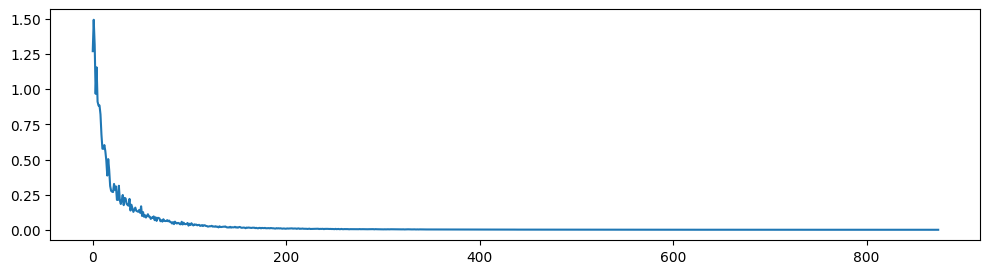

In [14]:
loss_history = trainer.loss_history

plt.figure(figsize=(12,3))
plt.plot(loss_history)
plt.show()